
Ordinary differential equations
=========================================

Let’s consider a simple 1st order equation: 
$$\frac{dy}{dx}=f(x,y)$$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

Euler’s method
--------------

Suppose that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ at a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, where $\Delta x$ is small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0,\end{eqnarray}$$ with
$y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:
$$\frac{\Delta y}{\Delta x}=f(x,y)$$ or 
$$\Delta y = f(x,y)\Delta x$$
and approximate the value of $y_1$ as
$$y_1=y_0+f(x_0,y_0)(x_1-x_0)$$ We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as
$$y_{2}=y_1+f(x_1,y_1)\Delta x,$$ or in the general case:
$$y_{n+1}=y_n+f(x_n,y_n)\Delta x$$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. The “local error” calculating $x_1$ is then
$O(\Delta x^2)$. If we use the method $N$ times to calculate $N$
consecutive points, the propagated “global” error will be
$NO(\Delta x^2)\approx O(\Delta 
x)$. This error decreases linearly with decreasing step, so we need to
halve the step size to reduce the error in half. The numerical work for
each step consists of a single evaluation of $f$.

### Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $$\frac{dT}{dt}=-r(T-T_s),$$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Below is a program that calculates the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Results are plotted for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compared with exact (analytical)
results.

In [1]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [2]:
T = T0
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    if i%10==0:
        print (i,i*dt, T)
        if i*dt==10:
            check=T
    # we can also do t = t - r*(t-ts)*dt, it would save some memory and processing time.
    

10 0.5 13.568960475998653
20 1.0 16.963434939952915
30 1.5 20.191953990227184
40 2.0 23.26263116534477
50 2.5 26.183183333989128
60 3.0 28.960950088140557
70 3.5 31.602912188085003
80 4.0 34.115709105648804
90 4.5 36.50565570974689
100 5.0 38.77875813617685
110 5.5 40.94072888154071
120 6.0 42.99700115922691
130 6.5 44.952742553530186
140 7.0 46.81286800622329
150 7.5 48.58205216821692
160 8.0 50.264741147348666
170 8.5 51.865163681823965
180 9.0 53.38734176738914
190 9.5 54.835100764943164
200 10.0 56.21207901398977
210 10.5 57.52173697608902
220 11.0 58.76736593128677
230 11.5 59.95209624937685
240 12.0 61.07890525678226
250 12.5 62.15062471882562
260 13.0 63.16994795619239
270 13.5 64.1394366134711
280 14.0 65.06152709678052
290 14.5 65.9385366966622
300 15.0 66.7726694116254
310 15.5 67.56602148697982
320 16.0 68.32058668287546
330 16.5 69.03826128478869
340 17.0 69.72084886904635
350 17.5 70.37006483536398
360 18.0 70.98754071778882
370 18.5 71.57482828488136
380 19.0 72.133403439

Let's plot the results. We first need to import the required libraries and methods

In [3]:
#%matplotlib inline
import numpy as np
from matplotlib import pyplot 

Next, we create numpy arrays to store the (x,y) values 

In [4]:
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)

We have to rewrite the loop to store the values in the arrays. Remember that numpy arrays start from 0.

In [5]:
T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = T - r*(T-Ts)*dt
    my_time[i] = i*dt
    my_temp[i] = T
    

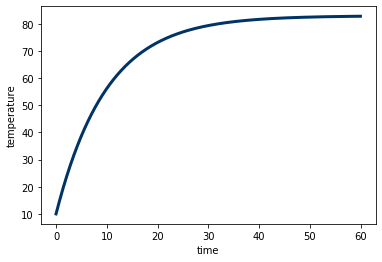

In [6]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

We could have saved effort by defining

In [7]:
my_time = np.linspace(0.,tmax,nsteps)

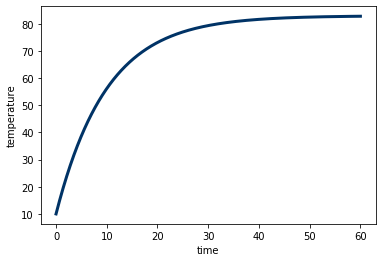

In [7]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [8]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

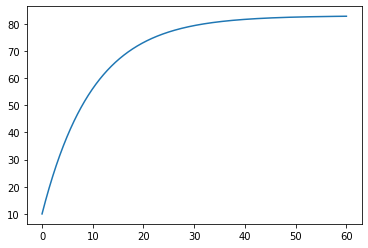

In [9]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T
pyplot.plot(my_time,my_temp)

Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="https://realpython.com/python-lambda/">here</a>).

In [10]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps on the convergence. Notice the initial time step `dt=1`; it is then divided in half in every iteration. Note how the convergence changes ever so slightly depending on `dt`

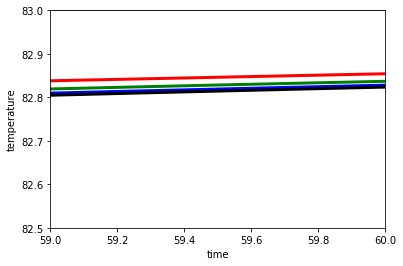

In [11]:
dt = 1.
check=83
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/2.
pyplot.plot(my_time,check*np.ones([len(my_time),1]))
pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(59,60)
pyplot.ylim(82.5,83);

Runge-Kutta methods
-------------------

### 2nd order Runge-Kutta

Euler’s method rests on the idea that the slope at one point can be used
to extrapolate to the next. A plausible idea to make a better estimate
of the slope is to extrapolate to a point halfway across the interval,
and then to use the derivative at this point to extrapolate across the
whole interval. Thus,

$$\begin{eqnarray}
k&=&\Delta x f(x_n,y_x), \\
y_{n+1}&=&y_n+\Delta x f(x+\Delta x/2, y_n+k/2) + O(\Delta 
x^3).\end{eqnarray}$$

It has the same accuracy as the Taylor series. It requires
the evaluation of $f$ twice for each step.

### 4th order Runge-Kutta

Similar ideas can be used to derive a 3rd or 4th order Runge-Kutta
method. It has been found by experience that the best balance between
accuracy and computational effort is given by a fourth-order algorithm.
Such a method would require evaluating $f$ four times at each step, with
a local accuracy of $O(\Delta x^5)$. It can be written as follows:
$$\begin{eqnarray}
 k_1&=&\Delta x f(x_n,y_n), \\
 k_2&=&\Delta x f(x_n+\Delta x/2,y_n+k_1/2), \\
 k_3&=&\Delta x f(x_n+\Delta x/2,y_n+k_2/2), \\
 k_4&=&\Delta x f(x_n+\Delta x,y_n+k_3), \\
 y_{n+1}&=&y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)+O(\Delta x^5).\end{eqnarray}$$

Runge-Kutta method are self-staring, meaning that they can be used to
obtain the first few iterations for a non self-starting algorithm.

### Newton's Law of Cooling

Using the 4th order Runge-Kutta Methods,

In [12]:
def rk4insteps(T,func,dt):
    k1 = dt*func(T,dt)
    k2 = dt*func(T+0.5*k1,dt)
    k3 =dt*func(T+0.5*k2,dt)
    k4 = dt*func(T+k3,dt)
    T += (k1+2*k2+2*k3+k4)/6
    return T

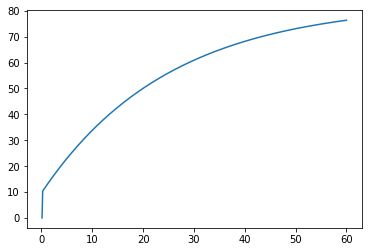

In [13]:
fT = lambda T,t: -r*(T-Ts)
T = T0
dt = 0.05
for i in range(1,nsteps):
    T = rk4insteps(T, fT, dt)
    my_temp[i] = T
pyplot.plot(my_time,my_temp)

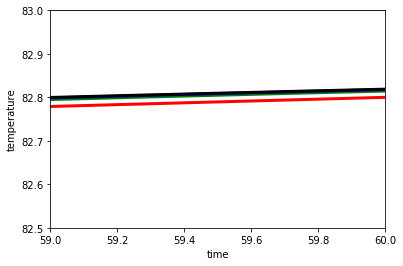

In [14]:
dt = 1
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(1,nsteps):
        T = rk4insteps(T,fT,dt)
        my_temp[i] = T
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3)
    dt = dt/4.
pyplot.plot(my_time,check*np.ones([len(my_time),1]))
pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.xlim(59,60)
pyplot.ylim(82.5,83);

# ODE solvers in `scipy.integrate`
The `scipy` package contains a number of ode solvers that act much like analogous functions in MATLAB. They include:

- `OdeSolution`: Continuous ODE solution.
- `odeint`: (*deprecated, but it still works*) Integrate a system of ordinary differential equations.
- `solve_ivp`: Solve an initial value problem for a system of ODEs.

There are also a number of routines - functions that don't solve the equation for you, but act as 1 step in the solving process, much like the "homegrown" routines in `diffeq.py` that I have supplied

- `solve_ivp`: Solve an initial value problem for a system of ODEs.
- `RK23`: Explicit Runge-Kutta method of order 3(2).
- `RK45`:	Explicit Runge-Kutta method of order 5(4).
- `Radau`: Implicit Runge-Kutta method of Radau IIA family of order 5.
- `BDF`: Implicit method based on backward-differentiation formulas.
- `LSODA`: Adams/BDF method with automatic stiffness detection and switching.

And finally, there are some class methods, but they require a little too much set up for us.

- `OdeSolver`: Base class for ODE solvers.
- `DenseOutput`: Base class for local interpolant over step made by an ODE solver.

You should refer to the [scipy reference page](https://docs.scipy.org/doc/scipy/reference/integrate.html) for more details. Below are several examples of ode solvers using the equation, $$\frac{dy}{dx} +y = x,$$ where $y(0)=1$, as shown in [ode example](http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html).
This differential equation has an exact solution: $$y(x) = x-1+2e^{-x}$$

In [16]:
import scipy.integrate as scint
func= lambda y,x: -y+x
yexact = lambda x: x-1+2*np.exp(-x)
y0=1
xspan = np.linspace(0,5,100)

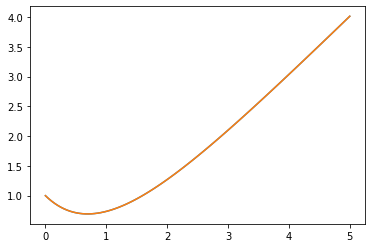

In [17]:
ysol1 = scint.odeint(func,y0,xspan)
ysol1 = np.ndarray.flatten(ysol1)
pyplot.plot(xspan,ysol1)
pyplot.plot(xspan,yexact(xspan))

Below is the difference between the numeric solution and the exact solution graphed on a semi-log plot. The error is small and varies along the interval.

Text(0.5, 0, 'x')

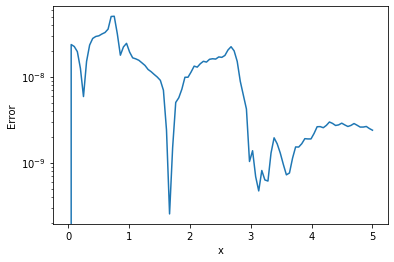

In [18]:
ydiff = np.abs(yexact(xspan) - ysol1)
pyplot.semilogy(xspan,ydiff)
pyplot.ylabel("Error")
pyplot.xlabel("x")